In [53]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

# Lee el archivo CSV
archivo_csv = "obesity.csv"
datos = pd.read_csv(archivo_csv)

datos

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,Automobile,Bike,Motorbike,Public_Transportation,Walking,NObeyesdad
0,0,21.000000,1,0,2.0,3.0,1,0,2.000000,0,0.000000,1.000000,0,0,0,0,1,0,0
1,0,21.000000,1,0,3.0,3.0,1,1,3.000000,1,3.000000,0.000000,1,0,0,0,1,0,0
2,1,23.000000,1,0,2.0,3.0,1,0,2.000000,0,2.000000,1.000000,2,0,0,0,1,0,0
3,1,27.000000,0,0,3.0,3.0,1,0,2.000000,0,2.000000,0.000000,2,0,0,0,0,1,0
4,1,22.000000,0,0,2.0,1.0,1,0,2.000000,0,0.000000,0.000000,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1,1,3.0,3.0,1,0,1.728139,0,1.676269,0.906247,1,0,0,0,1,0,1
2107,0,21.982942,1,1,3.0,3.0,1,0,2.005130,0,1.341390,0.599270,1,0,0,0,1,0,1
2108,0,22.524036,1,1,3.0,3.0,1,0,2.054193,0,1.414209,0.646288,1,0,0,0,1,0,1
2109,0,24.361936,1,1,3.0,3.0,1,0,2.852339,0,1.139107,0.586035,1,0,0,0,1,0,1


In [54]:
# Itera sobre todas las columnas y muestra los valores y sus frecuencias
for columna in datos.columns:
    conteo_valores = datos[columna].value_counts()
    print(f"\nColumna: {columna}\n{conteo_valores}")


Columna: Gender
Gender
1    1068
0    1043
Name: count, dtype: int64

Columna: Age
Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

Columna: family_history_with_overweight
family_history_with_overweight
1    1726
0     385
Name: count, dtype: int64

Columna: FAVC
FAVC
1    1866
0     245
Name: count, dtype: int64

Columna: FCVC
FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: count, Length: 810, dtype: int64

Columna: NCP
NCP
3.000000    1203
1.000000     199
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1
3.118013       1
3.335876       1
3.205009       1
1.089048       1
Name: count, Length: 635, dtype: int64

Columna: CAEC
CAEC
1 

- FCVC realmente se encuentra en una escala de 1 a 3
- NCP realmente se encuentra en una escala de 1 a 4

Por lo tanto, he decidido redondear estos valores para asemejarlos lo más posible a la documentación proprocionada.

In [55]:
# Nombre de las columnas a redondear
columnas_a_redondear = ["FCVC", "NCP"]

# Redondear los valores de las columnas específicas a enteros
datos[columnas_a_redondear] = datos[columnas_a_redondear].round().astype(int)

In [56]:
# Itera sobre todas las columnas y muestra los valores y sus frecuencias
for columna in datos.columns:
    conteo_valores = datos[columna].value_counts()
    print(f"\nColumna: {columna}\n{conteo_valores}")


Columna: Gender
Gender
1    1068
0    1043
Name: count, dtype: int64

Columna: Age
Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64

Columna: family_history_with_overweight
family_history_with_overweight
1    1726
0     385
Name: count, dtype: int64

Columna: FAVC
FAVC
1    1866
0     245
Name: count, dtype: int64

Columna: FCVC
FCVC
2    1013
3     996
1     102
Name: count, dtype: int64

Columna: NCP
NCP
3    1470
1     316
2     176
4     149
Name: count, dtype: int64

Columna: CAEC
CAEC
1    1765
2     242
3      53
0      51
Name: count, dtype: int64

Columna: SMOKE
SMOKE
0    2067
1      44
Name: count, dtype: int64

Columna: CH2O
CH2O
2.000000    448
1.000000    211
3.000000    162
2.825629      3
1.636326      3
           ... 
1.622638      1
2.452986      1
2.035954      1
1.944095      1
2.86351

In [57]:
columnas_seleccionadas = ['Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC']

columnas_seleccionadas_con_obesidad = ['Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'NObeyesdad']

--------------------------------------------------------------------------------------------------------------------------------------------------------

# Examen/Proyecto UT1, UT2 y UT3

In [59]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(datos[['Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'NObeyesdad']], test_size=0.33)

train.reset_index(inplace = True)

train

,index,Age,family_history_with_overweight,FAVC,CAEC,SCC,NObeyesdad
0,1357,18.000000,1,1,1,0,1
1,1971,19.297004,1,1,1,0,1
2,1672,30.796262,1,1,1,0,1
3,326,18.000000,1,1,1,0,0
4,1118,18.198322,1,0,1,0,0
...,...,...,...,...,...,...,...
1409,1369,18.078256,1,1,1,0,1
1410,1025,38.464538,1,1,1,0,0
1411,1618,41.000000,1,1,1,0,1
1412,1937,21.140165,1,1,1,0,1


1) (10%) Entrenar un modelo utilizando KNN. Realizar una búsqueda de los parámetros que ofrecen mejores resultados aplicando Cross Validation.  Se valorará si se utiliza una gráfica para mostrar los diferentes niveles precisión para cada uno de los parámetros probados.

Max Value uniform : 0.9731273337844272 (5)
Max Value distance : 0.9724256321579832 (6)


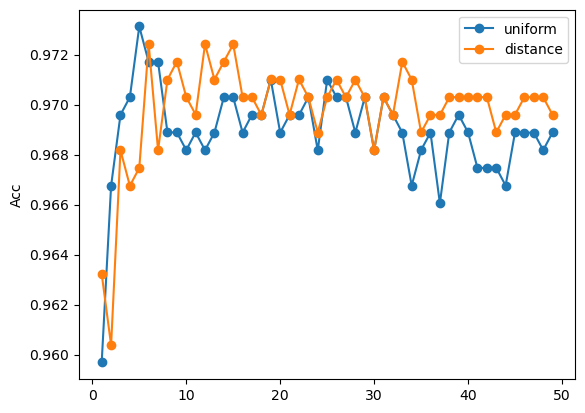

In [60]:
from sklearn import neighbors
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# Para el entrenamiento se aplica Cross Validation (Validación cruzada)
cv = KFold(n_splits = 5, shuffle = True) # shuffle = False si hay dimensión temporal


for i, weights in enumerate(['uniform', 'distance']):
   total_scores = []
   for n_neighbors in range(1,50):
       fold_accuracy = []
       knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights) # La métrica por defecto es minkowski
       #knn = neighbors.KNeighborsClassifier(n_neighbors, weights=weights, metric="euclidean")
       for train_fold, test_fold in cv.split(train):
          # División train test aleatoria
          f_train = train.loc[train_fold]
          f_test = train.loc[test_fold]
          # entrenamiento y ejecución del modelo
          knn.fit( X = f_train.drop(['NObeyesdad'], axis=1),
                               y = f_train['NObeyesdad'])
          y_pred = knn.predict(X = f_test.drop(['NObeyesdad'], axis = 1))
          # evaluación del modelo
          acc = accuracy_score(f_test['NObeyesdad'], y_pred)
          fold_accuracy.append(acc)
       total_scores.append(sum(fold_accuracy)/len(fold_accuracy))

   plt.plot(range(1,len(total_scores)+1), total_scores,
             marker='o', label=weights)
   print ('Max Value ' +  weights + " : " +  str(max(total_scores)) +" (" + str(np.argmax(total_scores) + 1) + ")")
   plt.ylabel('Acc')


plt.legend()
plt.show()

In [61]:
total_scores

[0.9632283286970905,
 0.9603764128010426,
 0.9681753251635214,
 0.9667518732927348,
 0.9674661053053655,
 0.9724256321579832,
 0.9681753251635214,
 0.9709996742099591,
 0.9717189183770645,
 0.9703029847379897,
 0.9696037891887828,
 0.9724206200035086,
 0.9710046863644337,
 0.9717164122998272,
 0.9724131017717965,
 0.9702979725835149,
 0.9702979725835149,
 0.9695837405708844,
 0.9710071924416711,
 0.9710021802871964,
 0.9695937648798336,
 0.9710071924416711,
 0.9702954665062776,
 0.9688845450216774,
 0.9702954665062776,
 0.9709971681327219,
 0.9702929604290403,
 0.9709921559782473,
 0.9702954665062776,
 0.9681703130090469,
 0.9703029847379897,
 0.9695812344936471,
 0.9717114001453524,
 0.9709996742099591,
 0.9688895571761522,
 0.9695862466481217,
 0.9695837405708844,
 0.9702929604290403,
 0.970305490815227,
 0.9702954665062776,
 0.9703004786607524,
 0.9703004786607524,
 0.9688895571761522,
 0.9695912588025962,
 0.9695987770343082,
 0.9703004786607524,
 0.9702979725835149,
 0.97029797258

In [62]:
# constructor
n_neighbors = 12 
weights = 'distance'
knn = neighbors.KNeighborsClassifier(n_neighbors= n_neighbors, weights=weights) # Se utiliza este método porque es un problema de clasificación
# fit and predict
knn.fit(X = train[['Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC']], y = train['NObeyesdad']) # En este caso no entrena sino memoriza los valores
y_pred = knn.predict(X = test[['Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC']])
acc = accuracy_score(test['NObeyesdad'], y_pred)
print ('Acc', acc)

Acc 0.7489239598278336


In [63]:
from sklearn.metrics import classification_report
print(classification_report(test['NObeyesdad'], y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       375
           1       0.73      0.73      0.73       322

    accuracy                           0.75       697
   macro avg       0.75      0.75      0.75       697
weighted avg       0.75      0.75      0.75       697



2) (10%) Entrenar un modelo utilizando alguna de las técnicas de árboles que hemos visto en clase. Si no ha dado tiempo de verlo en clase se propone realizar una pequeña investigación sobre posibles modelos y proponer uno que consideren adecuado para el entrenamiento. Justificando la elección del mismo.

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

X_tree = datos[columnas_seleccionadas_con_obesidad].drop('NObeyesdad', axis=1)  # Características
y_tree = datos['NObeyesdad']  # Etiquetas de clase

In [65]:
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

# Crear el modelo
model_tree = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
model_tree = model_tree.fit(X_train_tree, y_train_tree)

In [67]:
# Realizar predicciones en el conjunto de prueba
y_pred_tree = model_tree.predict(X_test_tree)

# Evaluar la precisión del modelo
accuracy_tree = accuracy_score(y_test_tree, y_pred_tree)
print(f'Precisión del modelo: {accuracy_tree:.2f}')

# Mostrar informe de clasificación
print('Informe de clasificación:')
print(classification_report(y_test_tree, y_pred_tree))

Precisión del modelo: 0.77
Informe de clasificación:
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       224
           1       0.81      0.67      0.74       199

    accuracy                           0.77       423
   macro avg       0.78      0.77      0.77       423
weighted avg       0.78      0.77      0.77       423



3) (10%) De las tres técnicas utilizadas (NAIVEBAYES, KNN, ARBOLES), selecciona aquella que te ofrece mejores resultados de predicción. Argumenta tu elección.

4) (5%) Exporta el fichero .pkl que contiene el modelo y los parámetros utilizados durante el entrenamiento.

In [68]:
import sklearn.externals
import joblib
import pickle

joblib.dump(knn,'KNN_model_obesity.pkl')

['KNN_model_obesity.pkl']

5) (10%) Importa el modelo .pkl y realiza una predicción utilizando un conjunto de valores, definido por ti, asociados a las características con las que entrenaste el modelo.

In [69]:
# Para importar el modelo entrenado y ejecutar de nuevo test
clf_entrenado = neighbors.KNeighborsClassifier(50, weights="distance")
clf_entrenado = joblib.load('KNN_model_obesity.pkl')

In [74]:
clf_entrenado.predict(np.array([[40,1,0,0,0]]))

c:\Users\Beatriz\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)